In [1]:
import pandas as pd
import torch.nn as nn
import torch
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

,Unnamed: 0,Date,Close,Open,High,Low,PE,Ratio
0,0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34,17.12
1,1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34,17.12
2,2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34,17.12
3,3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34,17.12
4,4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34,17.12
...,...,...,...,...,...,...,...,...
15671,15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


In [3]:
rows = [x for x in data.index if data.loc[x]['Open'] == 0]
data = data.drop(rows, axis=0)

In [4]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data

,Unnamed: 0,Date,Close,Open,High,Low,PE,Ratio
5015,5015,1980-01-02,105.760002,107.940002,108.430000,105.290001,8.85,7.39
5016,5016,1980-01-03,105.220001,105.760002,106.080002,103.260002,8.85,7.39
5017,5017,1980-01-04,106.519997,105.220001,107.080002,105.089996,8.85,7.39
5018,5018,1980-01-07,106.809998,106.519997,107.800003,105.800003,8.85,7.39
5019,5019,1980-01-08,108.949997,106.809998,109.290001,106.290001,8.85,7.39
...,...,...,...,...,...,...,...,...
15671,15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

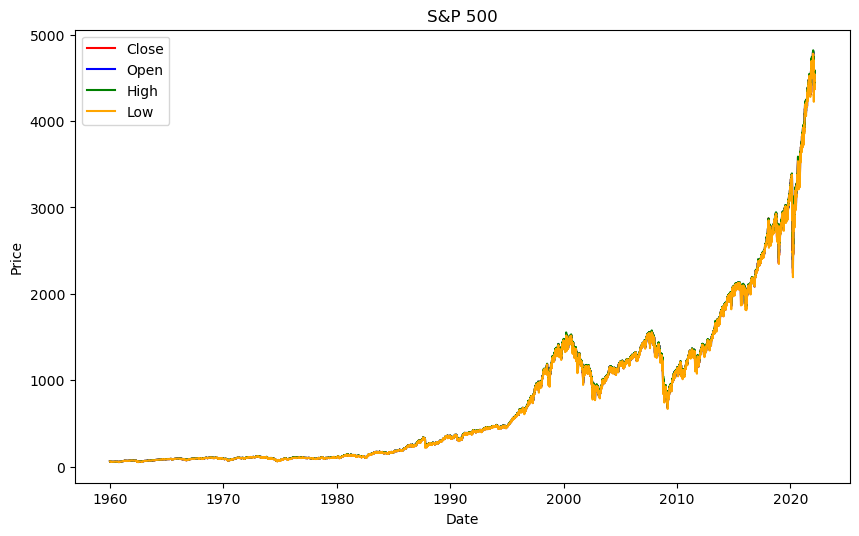

In [5]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values,'red', label = 'Close')
plt.plot(data.Date, data.Open.values, 'blue', label = 'Open')
plt.plot(data.Date, data.High.values, 'green', label = 'High')
plt.plot(data.Date, data.Low.values, 'orange', label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500")
plt

In [6]:
dataset = data[['Close', 'Open', 'High', 'Low']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.00162509, 0.00162237, 0.00161757, 0.00181023],
       [0.00172626, 0.00172337, 0.00171827, 0.00191173],
       [0.00167146, 0.00166866, 0.00166372, 0.00185675],
       ...,
       [0.93139433, 0.92104261, 0.9274403 , 0.92582301],
       [0.93222479, 0.92661253, 0.93096076, 0.9259076 ],
       [0.91225371, 0.92667776, 0.92393453, 0.91409249]])

In [7]:
test_dataset = test_data[['Close', 'Open', 'High', 'Low']].values
test_scaler = MinMaxScaler(feature_range = (0, 1))
test_dataset = test_scaler.fit_transform(test_dataset)
test_dataset

array([[0.00160482, 0.00206532, 0.00187538, 0.00236032],
       [0.00148989, 0.00160211, 0.0013774 , 0.00192709],
       [0.00176658, 0.00148737, 0.00158931, 0.00231763],
       ...,
       [0.93072234, 0.92027053, 0.92671179, 0.92514421],
       [0.93156093, 0.92589492, 0.9302676 , 0.92522958],
       [0.91139424, 0.92596079, 0.92317081, 0.91330634]])

In [8]:
date = data[['Date']].values
date.shape

(15640, 1)

In [9]:
test_date = test_data[['Date']].values
test_date.shape

(10625, 1)

In [11]:
# training:0: 0 -180：181 当你输入0-180 predict：181
# 1: 1 -181: 182    1-181， predict：182


# test:2. 200-380 predict：x
#         ｜x - actual｜ / actual 


seq_len = 180
input_size = 4
output_size = 4

real_list = []
label_list = []
date_list = []
for i in range(dataset.shape[0] - seq_len - output_size + 1):
    real_list.append(dataset[i: i + seq_len, ])
    label_list.append(dataset[i + seq_len: i + seq_len + output_size, 0])
    date_list.append(date[i + seq_len])
real_list = np.array(real_list)
label_list = np.array(label_list)
date_list = np.array(date_list)
label_list = np.reshape(label_list, (label_list.shape[0], 1, label_list.shape[1]))
print("real_list: " , real_list.shape)
print("label_list: " , label_list.shape)
print("date_list: " , date_list.shape)

real_list:  (15457, 180, 4)
label_list:  (15457, 1, 4)
date_list:  (15457, 1)


In [12]:
seq_len = 180
input_size = 4
output_size = 4

test_real = []
test_label = []
test_date_list = []
for i in range(test_dataset.shape[0] - seq_len - output_size + 1):
    test_real.append(test_dataset[i: i + seq_len, ])
    test_label.append(test_dataset[i + seq_len: i + seq_len + output_size, 0])
    test_date_list.append(test_date[i + seq_len])
test_real = np.array(test_real)
test_label = np.array(test_label)
test_date_list = np.array(test_date_list)
test_label = np.reshape(test_label, (test_label.shape[0], 1, test_label.shape[1]))
print("test_real_list: " , test_real.shape)
print("test_label_list: " , test_label.shape)
print("test_date_list: " , test_date_list.shape)

test_real_list:  (10442, 180, 4)
test_label_list:  (10442, 1, 4)
test_date_list:  (10442, 1)


In [13]:
real_train_list = []
label_train_list = []
real_test_list = []
label_test_list = []
date_train_list = []
date_test_list = []

"""
80% 用于训练
"""
for i in range(real_list.shape[0]):
    if i % real_list.shape[0] <= real_list.shape[0] * 0.8:
        real_train_list.append(real_list[i,])
        label_train_list.append(label_list[i,])
        date_train_list.append(date_list[i,])
    else:
        real_test_list.append(real_list[i,])
        label_test_list.append(label_list[i,])
        date_test_list.append(date_list[i,])
real_train_list = np.array(real_train_list)
label_train_list = np.array(label_train_list)
real_test_list = np.array(real_test_list)
label_test_list = np.array(label_test_list)
date_train_list = np.array(date_train_list)
date_test_list = np.array(date_test_list)
print("real_train_list: " , real_train_list.shape)
print("label_train_list: " , label_train_list.shape)
print("real_test_list: " , real_test_list.shape)
print("label_test_list: " , label_test_list.shape)
print("date_train_list: " , date_train_list.shape)
print("date_test_list: " , date_test_list.shape)

real_train_list:  (12366, 180, 4)
label_train_list:  (12366, 1, 4)
real_test_list:  (3091, 180, 4)
label_test_list:  (3091, 1, 4)
date_train_list:  (12366, 1)
date_test_list:  (3091, 1)


In [30]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [31]:
hidden_size = 60
num_layers = 1
learning_rate = 0.001
num_epochs = 100

In [32]:
model = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list).float())
    labels = Variable(torch.from_numpy(label_train_list).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

init
torch.Size([12366, 180, 4])
batch_size 12366
[0/100] Loss: 0.0128
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
[10/100] Loss: 0.0041
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
torch.Size([12366, 180, 4])
batch_size 12366
[20/100

<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

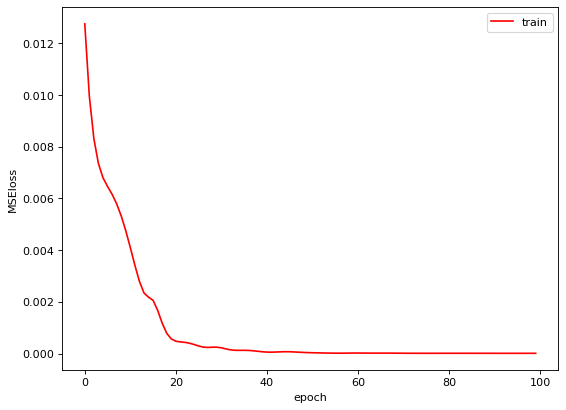

In [34]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [35]:
output, hidden = model(Variable(torch.from_numpy(test_real).float()))
output

torch.Size([10442, 180, 4])
batch_size 10442


tensor([[0.0060, 0.0057, 0.0054, 0.0051],
        [0.0061, 0.0059, 0.0056, 0.0052],
        [0.0063, 0.0060, 0.0057, 0.0054],
        ...,
        [0.7614, 0.7328, 0.7357, 0.7890],
        [0.7617, 0.7347, 0.7367, 0.7892],
        [0.7584, 0.7348, 0.7335, 0.7852]], grad_fn=<SliceBackward0>)

In [36]:
prediction = scaler.inverse_transform(output.detach().numpy())
prediction

array([[  80.515144,   79.50111 ,   78.13233 ,   75.36254 ],
       [  81.16311 ,   80.017525,   78.794426,   76.10644 ],
       [  82.04473 ,   80.757324,   79.55686 ,   76.94018 ],
       ...,
       [3664.377   , 3534.5427  , 3558.7256  , 3782.1245  ],
       [3665.8962  , 3543.701   , 3563.4836  , 3783.1958  ],
       [3650.3257  , 3544.0767  , 3548.43    , 3764.4365  ]],
      dtype=float32)

In [37]:
def calculate_prediction_error(predicted, actual):
    return abs(predicted - actual)/actual

In [38]:
actual = np.concatenate( (test_label[:, :, 0], test_label[:, :, 1], test_label[:, :, 2], test_label[:, :, 3]), axis = 1)
actual = test_scaler.inverse_transform(actual)
actual

array([[ 128.869995  ,  128.45106117,  130.74671332,  126.32417518],
       [ 128.399994  ,  129.30250546,  131.90177397,  125.35676108],
       [ 129.25      ,  130.45444535,  130.92749933,  126.29425619],
       ...,
       [4504.08      , 4425.95052648, 4421.99018921, 4455.41804922],
       [4418.64      , 4408.95181177, 4491.69595251, 4459.34754163],
       [4401.67      , 4478.4692426 , 4495.65331141, 4364.85023039]])

<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

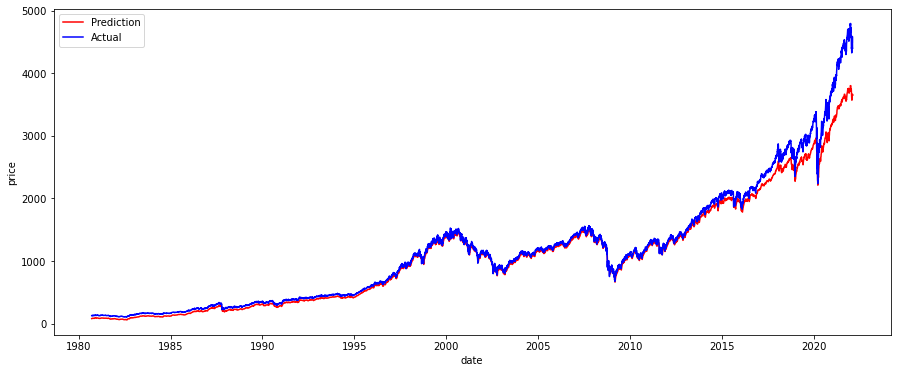

In [39]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.legend()
plt

In [40]:
error = calculate_prediction_error(prediction, actual)
error.shape

(10442, 4)

<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

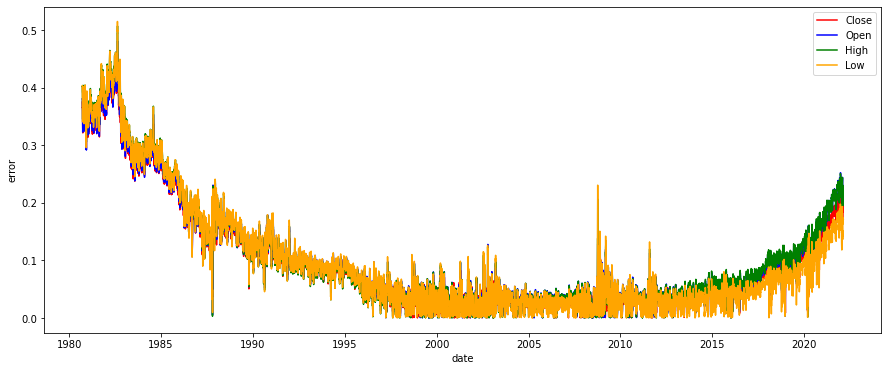

In [41]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], error[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0], error[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0], error[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0], error[:, 3], 'orange', label = 'Low')

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [42]:
"""

validation ｜ 把training dataset 分成 80% 20%，其中20%用来做validation dataset

"""


real_val_list = []
label_val_list = []
real_train_list_new = []
label_train_list_new = []
date_train_list_new = []
date_val_list = []



for i in range(real_train_list.shape[0]):
    if i % real_train_list.shape[0] <= real_train_list.shape[0] * 0.8:
        real_train_list_new.append(real_train_list[i,])
        label_train_list_new.append(label_train_list[i,])
        date_train_list_new.append(date_train_list[i,])
    else:
        real_val_list.append(real_train_list[i,])
        label_val_list.append(label_train_list[i,])
        date_val_list.append(date_train_list[i,])
real_train_list_new = np.array(real_train_list_new)
label_train_list_new = np.array(label_train_list_new)
real_val_list = np.array(real_val_list)
label_val_list = np.array(label_val_list)
date_train_list_new = np.array(date_train_list_new)
date_val_list = np.array(date_val_list)
print("real_train_list_new: " , real_train_list_new.shape)
print("label_train_list_new: " , label_train_list_new.shape)
print("real_val_list: " , real_val_list.shape)
print("label_val_list: " , label_val_list.shape)
print("date_train_list_new: " , date_train_list_new.shape)
print("date_val_list: " , date_val_list.shape)

"""
real_train_list_new:  (9893, 180, 4)
9893:batch size
180: seq length
4: feature
"""

real_train_list_new:  (9893, 180, 4)
label_train_list_new:  (9893, 1, 4)
real_val_list:  (2473, 180, 4)
label_val_list:  (2473, 1, 4)
date_train_list_new:  (9893, 1)
date_val_list:  (2473, 1)


In [43]:
model_val = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model_val.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

loss_arr = []
loss_val_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list_new).float())
    labels = Variable(torch.from_numpy(label_train_list_new).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model_val(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
       
    #loss for validation
    inputs_val = torch.from_numpy(real_val_list).float()
    labels_val = torch.from_numpy(label_val_list).float()
    output_val, hidden_val = model_val(inputs_val)
    loss_val = criterion(output_val.reshape(-1), labels_val.view(-1))
    loss_val_arr.append(loss_val.item())
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
        print("[%d/%d] Loss_Val: %.4f" % (epoch, num_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()                                

init
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
[0/100] Loss: 0.0235
[0/100] Loss_Val: 0.1116
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
[10

torch.Size([2473, 180, 4])
batch_size 2473
[90/100] Loss: 0.0000
[90/100] Loss_Val: 0.0001
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
torch.Size([9893, 180, 4])
batch_size 9893
torch.Size([2473, 180, 4])
batch_size 2473
[99/100] Loss: 0.0000
[99/100] Loss_Val: 0.0001


<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

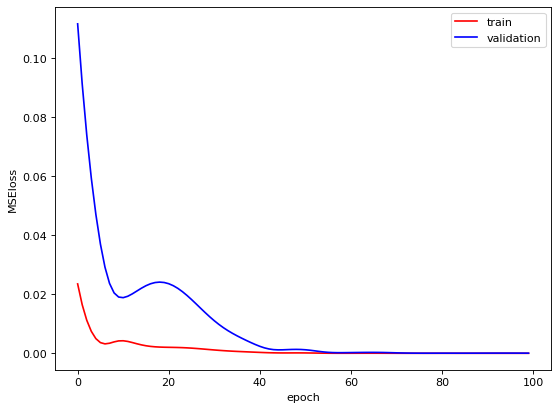

In [44]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.plot(np.array(loss_val_arr), 'b', label = 'validation')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [45]:
output_val, hidden = model_val(Variable(torch.from_numpy(test_real).float()))
output_val

torch.Size([10442, 180, 4])
batch_size 10442


tensor([[0.0049, 0.0060, 0.0060, 0.0055],
        [0.0050, 0.0062, 0.0063, 0.0056],
        [0.0052, 0.0064, 0.0064, 0.0059],
        ...,
        [0.7122, 0.6379, 0.7144, 0.7253],
        [0.7126, 0.6383, 0.7137, 0.7263],
        [0.7096, 0.6362, 0.7093, 0.7234]], grad_fn=<SliceBackward0>)

In [46]:
prediction_val = test_scaler.inverse_transform(output_val.detach().numpy())
prediction_val

array([[ 121.05764,  126.64504,  128.11163,  119.83926],
       [ 121.9312 ,  127.38287,  129.11668,  120.5827 ],
       [ 122.73695,  128.21735,  129.90216,  121.67776],
       ...,
       [3444.5735 , 3100.1807 , 3470.7808 , 3492.6357 ],
       [3446.1423 , 3102.1836 , 3467.7078 , 3497.7478 ],
       [3432.1572 , 3092.3633 , 3446.9175 , 3484.155  ]], dtype=float32)

<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

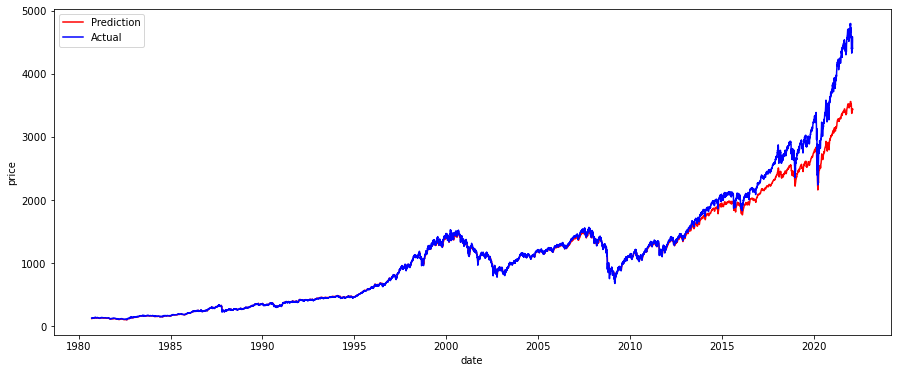

In [47]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.legend()
plt

In [48]:
error_val = calculate_prediction_error(prediction_val, actual)
error_val

array([[0.06062199, 0.01405998, 0.02015408, 0.05133553],
       [0.05038003, 0.01484605, 0.02111488, 0.03808377],
       [0.05039107, 0.01714851, 0.00783135, 0.03655351],
       ...,
       [0.23523261, 0.29954466, 0.2151089 , 0.21609247],
       [0.22008982, 0.29638977, 0.22797362, 0.21563687],
       [0.22026021, 0.30950441, 0.23327774, 0.20176986]])

<module 'matplotlib.pyplot' from '/Users/hangye/opt/anaconda3/envs/myconda1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

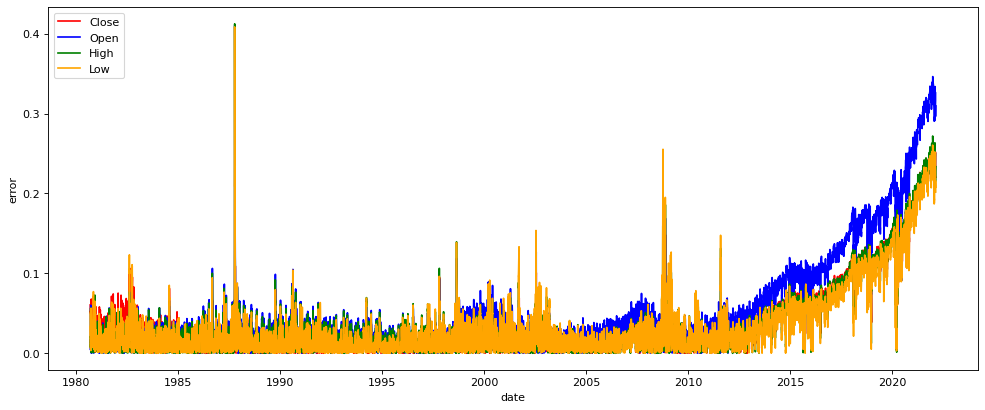

In [49]:
plt.figure(figsize=[15,6], dpi=80)
plt.plot(test_date_list[:, 0], error_val[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0],error_val[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0],error_val[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0],error_val[:, 3], 'orange', label = 'Low')
plt.xlabel("date")
plt.ylabel("error")
plt.legend()
plt

In [50]:
def add_gaussian_noise(dataset, std_dev):
    dataset_reshape = dataset.reshape(dataset.shape[0] * dataset.shape[1] * dataset.shape[2], 1)
    noise = np.random.normal(0, std_dev, int(len(dataset_reshape) * 0.2))
    # Add the noise to image
    gp = np.random.uniform(0, dataset.shape[0] * dataset.shape[1] * dataset.shape[2], int(len(dataset_reshape) * 0.2))
    for i in range(int(len(dataset_reshape) * 0.2)):
        if dataset_reshape[int(gp[i])]==1:
            dataset_reshape[int(gp[i])]-=abs(noise[i])
        else:
            dataset_reshape[int(gp[i])]+=abs(noise[i])
    #gaussian_out = img + noise
    # Make the value between 0 and 1
    dataset_reshape = dataset_reshape.reshape(dataset.shape[0], dataset.shape[1], dataset.shape[2])
    gaussian_out = np.clip(dataset_reshape, 0.00000001, 1)
    return gaussian_out

In [51]:
std_dev = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
gaussian_error_array = np.zeros([len(std_dev), test_real.shape[0], test_real.shape[2]])
for i in range(len(std_dev)):
    gaussian_real_test = add_gaussian_noise(test_real, std_dev[i])
    gaussian_label_test = add_gaussian_noise(test_label, std_dev[i])
#     gaussian_output = model(gaussian_real_test)
    gaussian_output, hidden = model_val(Variable(torch.from_numpy(gaussian_real_test).float()))
    gaussian_prediction = scaler.inverse_transform(gaussian_output.detach().numpy())
    gaussian_actual = np.concatenate( (gaussian_label_test[:, :, 0], gaussian_label_test[:, :, 1], gaussian_label_test[:, :, 2], gaussian_label_test[:, :, 3]), axis = 1)
    gaussian_actual = test_scaler.inverse_transform(gaussian_actual)
    gaussian_error = calculate_prediction_error(gaussian_prediction, gaussian_actual)
    gaussian_error_array[i] = gaussian_error
gaussian_error_array

torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442
torch.Size([10442, 180, 4])
batch_size 10442


array([[[0.40825681, 0.3635421 , 0.37160871, 0.38482702],
        [0.39081148, 0.35808864, 0.36841724, 0.3684261 ],
        [0.3956082 , 0.37255141, 0.35624745, 0.35643879],
        ...,
        [0.23808349, 0.3032751 , 0.21808375, 0.21902067],
        [0.22304549, 0.30014777, 0.23093411, 0.21818008],
        [0.22321957, 0.31317971, 0.23630556, 0.20444811]],

       [[0.40291878, 0.44043367, 0.36680461, 0.37703855],
        [0.38516127, 0.35326398, 0.36260145, 0.3645673 ],
        [0.39197299, 0.36692253, 0.35175486, 0.35070495],
        ...,
        [0.23731737, 0.30420163, 0.21745192, 0.21808984],
        [0.22655536, 0.30009965, 0.23091106, 0.21924884],
        [0.22313604, 0.31311756, 0.23625424, 0.20436007]],

       [[0.39657981, 0.43440463, 0.36168062, 0.37221224],
        [0.36041386, 0.33457173, 0.34593054, 0.34163678],
        [0.34481543, 0.31152862, 0.31058622, 0.29731216],
        ...,
        [0.2368878 , 0.3038488 , 0.21939044, 0.22099938],
        [0.22616199, 0.299722

In [52]:
gaussian_error_array.shape

(9, 10442, 4)

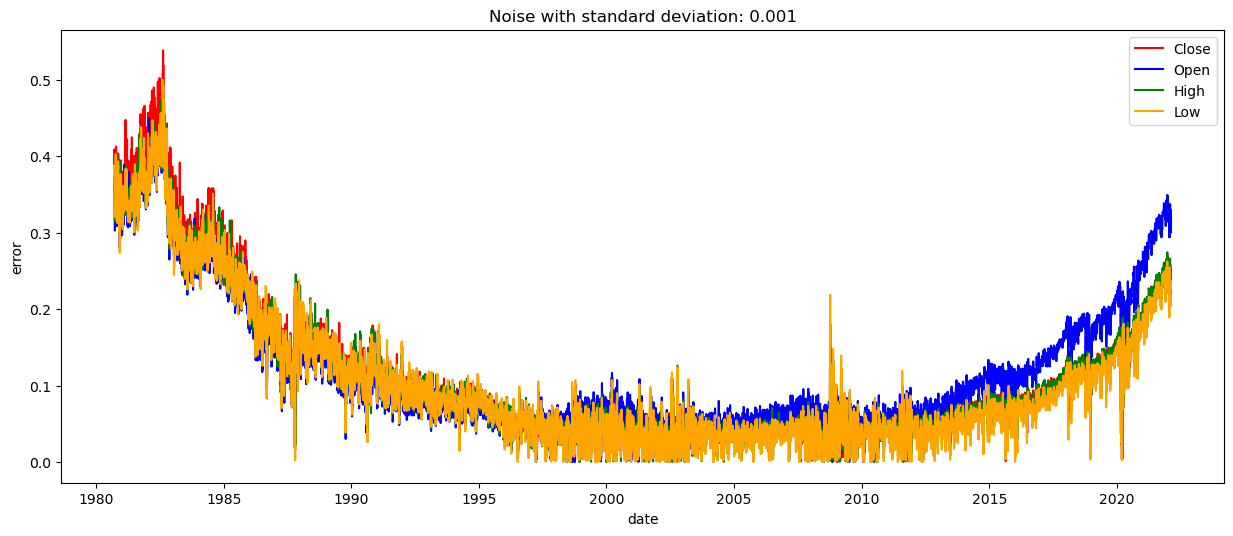

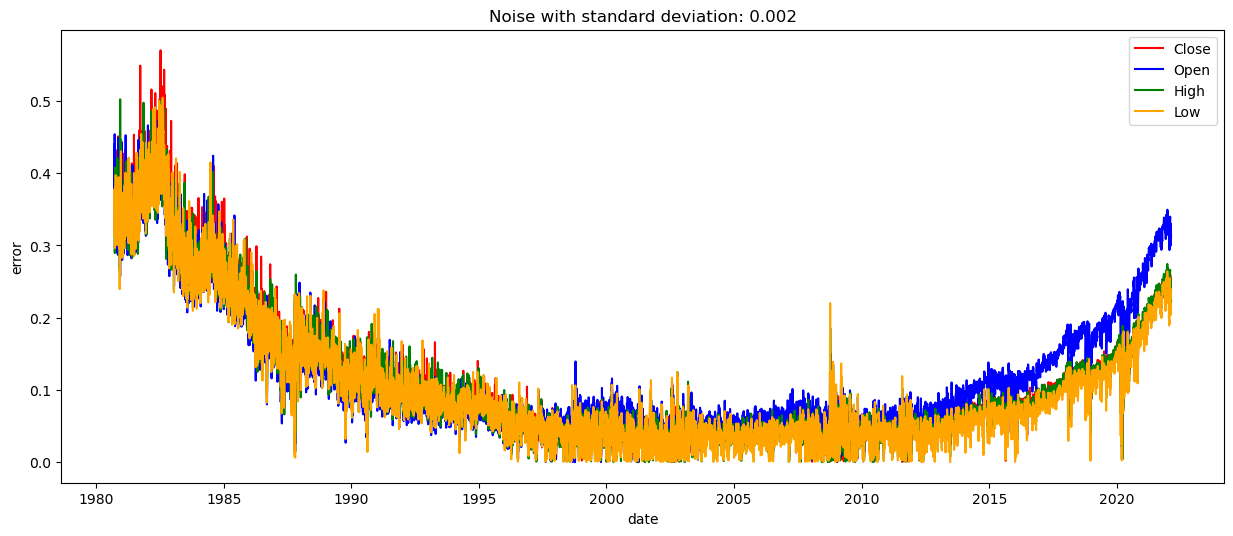

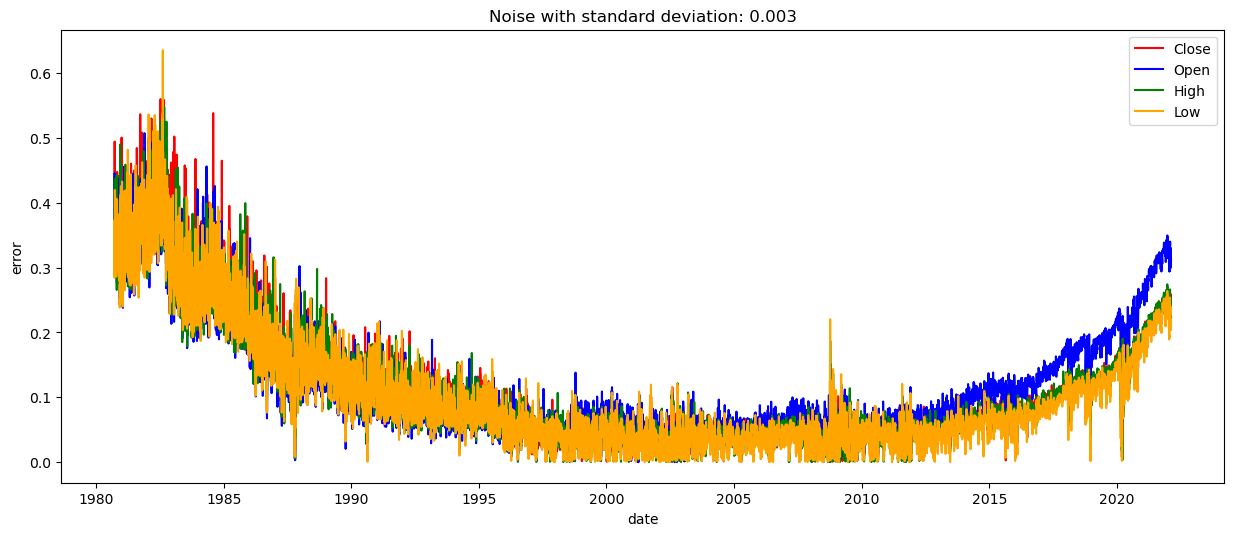

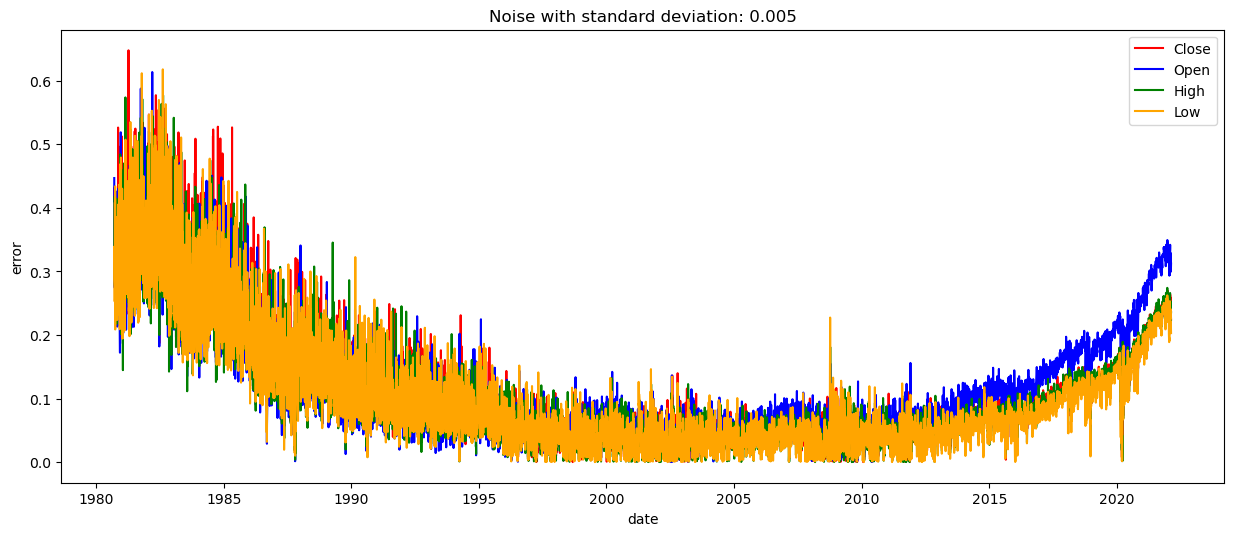

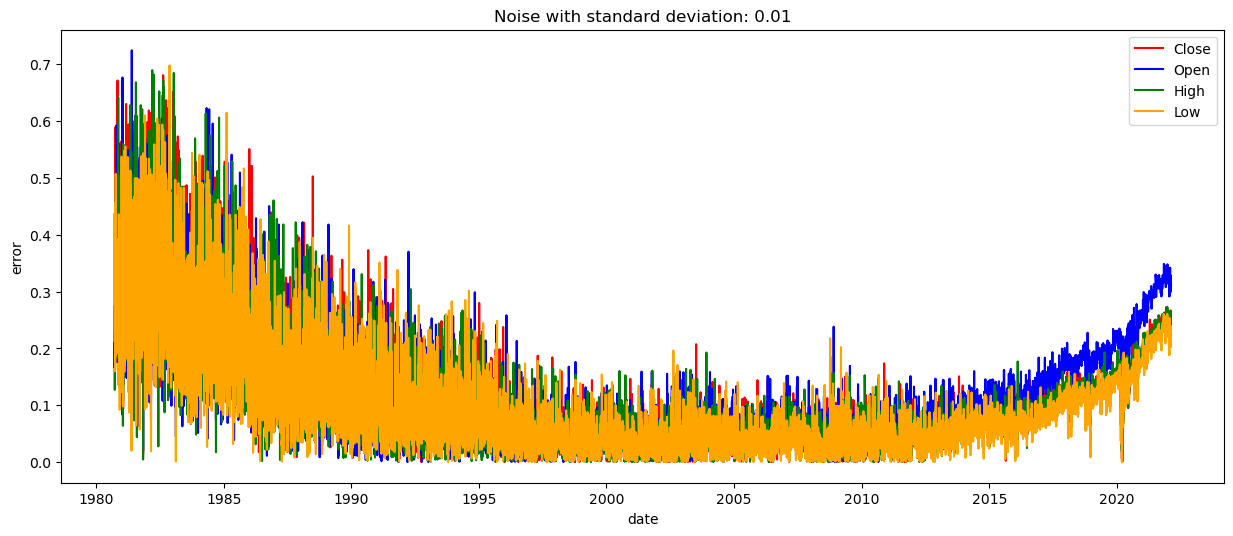

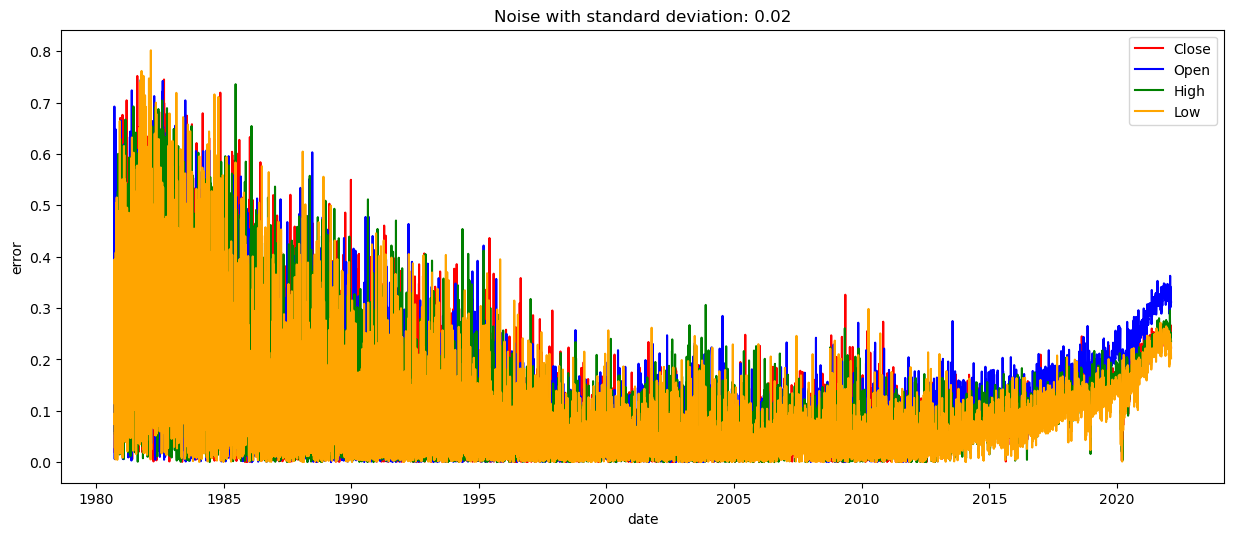

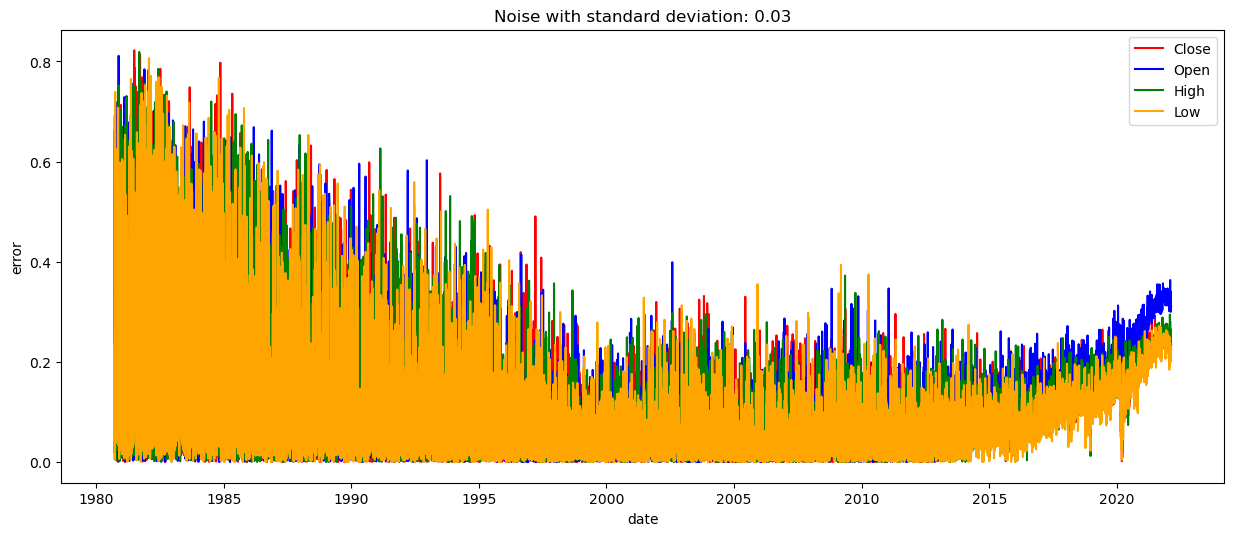

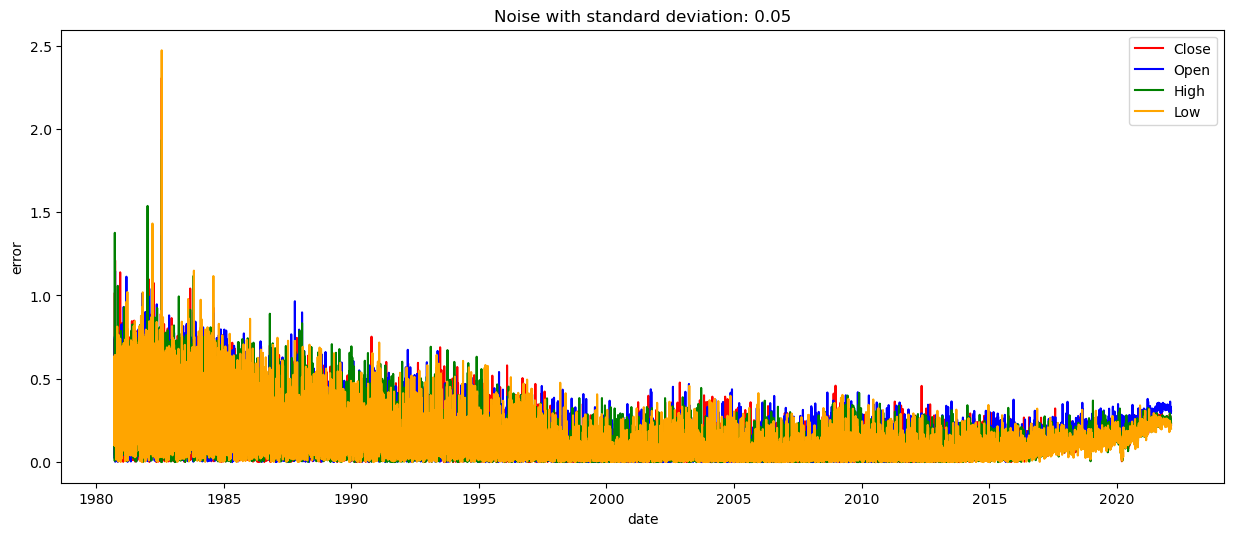

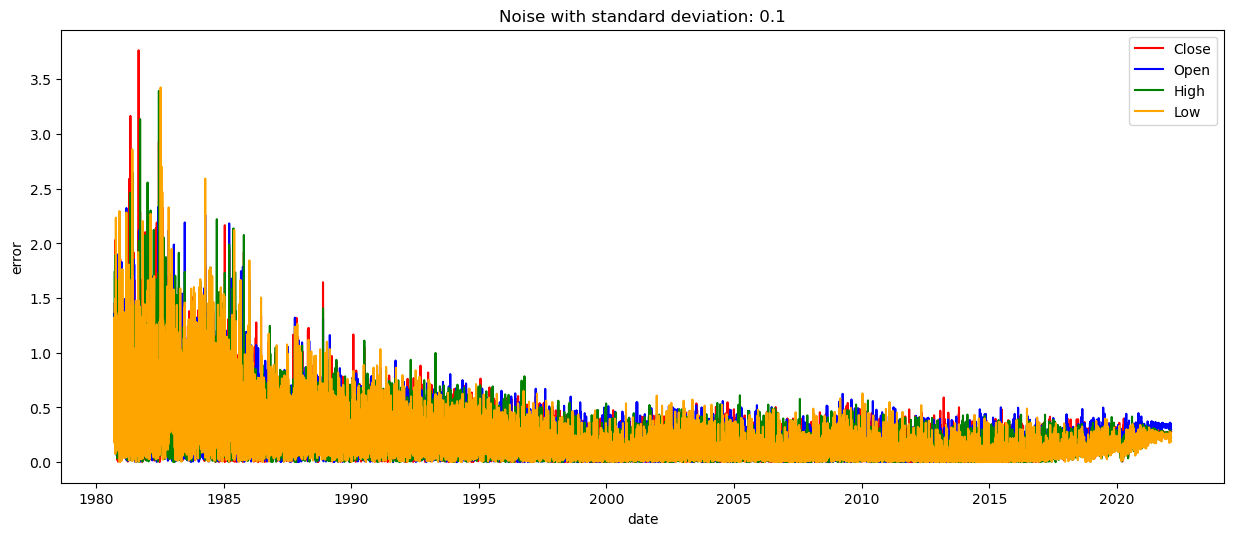

In [53]:
for i in range(len(std_dev)):
    plt.figure(figsize=[15,6], dpi=100)
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 0], 'red', label = 'Close')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 1], 'blue', label = 'Open')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 2], 'green', label = 'High')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 3], 'orange', label = 'Low')
    plt.xlabel("date")
    plt.ylabel("error")
    plt.legend()
    plt.title("Noise with standard deviation: " + str(std_dev[i]))
    plt.show()